In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img(img, name):
    print(name + ':')
    if img.ndim == 3:  # 如果图像是彩色的
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')  # 不显示坐标轴
    plt.show()

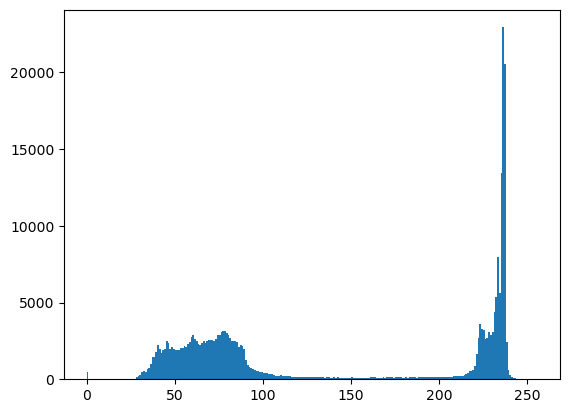

In [3]:
img = cv2.imread('./files/flower3.png', 0)
plt.hist(img.ravel(), 256, [0, 256]);
plt.show()

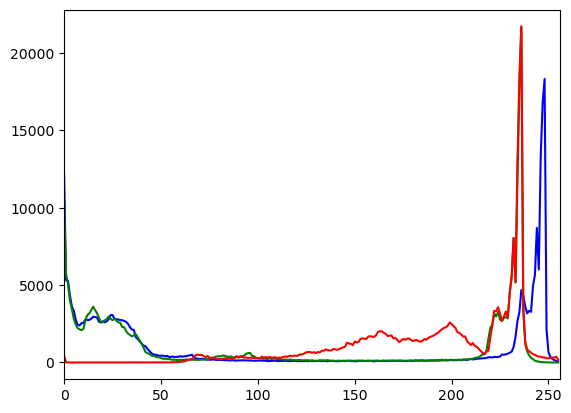

In [4]:
img = cv2.imread('./files/flower3.png')
color = ('b', 'g', 'r')
# 对一个列表或数组既要遍历索引又要遍历元素时
# 使用内置enumerrate 函数会有更加直接，优美的做法
#enumerate 会将数组或列表组成一个索引序列。
# 使我们再获取索引和索引内容的时候更加方便
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

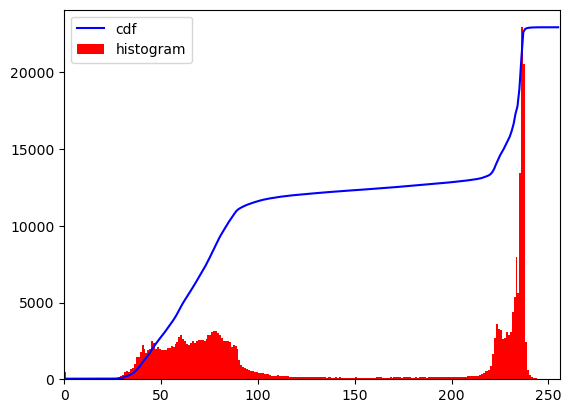

In [5]:
img = cv2.imread('./files/flower3.png', 0)
#flatten() 将数组变成一维
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# 计算累积分布图
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [6]:
img = cv2.imread('./files/flower2.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
cv2.imwrite('hist.jpg', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

原始图像:


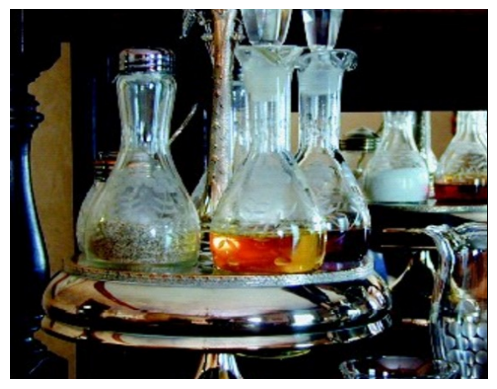

处理后图像:


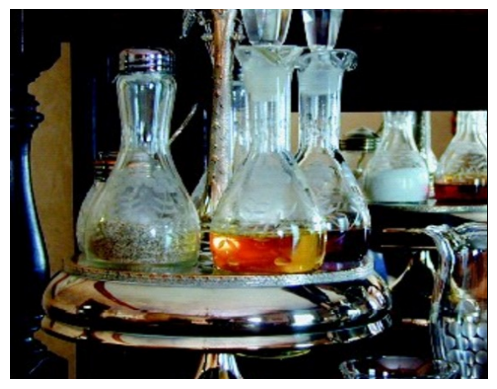

In [7]:
def hisEqulColor(img):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    channels = cv2.split(hls)
    cv2.equalizeHist(channels[1])
    cv2.merge(channels, hls)
    cv2.cvtColor(hls, cv2.COLOR_HLS2BGR, img)
    return img


img = cv2.imread('./files/Fig6.png')
eq = hisEqulColor(img)
show_img(img, "原始图像")
show_img(eq, "处理后图像")
# cv2.imshow('image1', img)
# cv2.imshow('image2', eq)
# cv2.waitKey(0)

处理前:


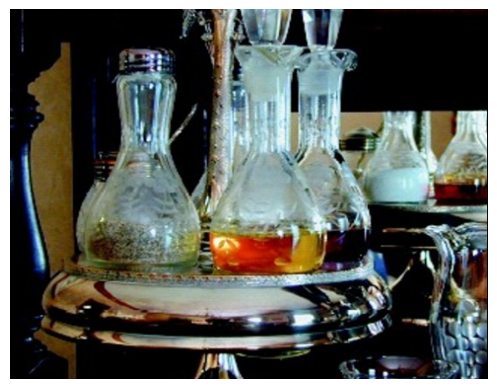

处理后:


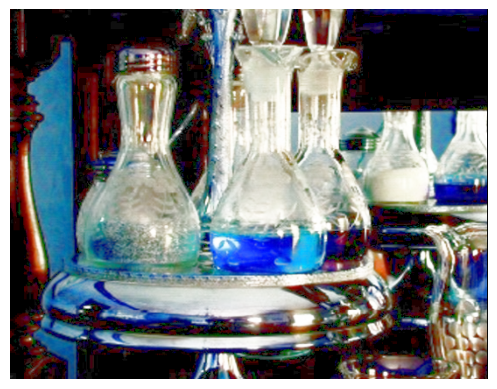

In [8]:
img = cv2.imread('./files/Fig6.png')
his = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
show_img(img, "处理前")
his_i = his[:, :, 1]
equal_i = cv2.equalizeHist(his_i)
his[:, :, 1] = equal_i
dst = cv2.cvtColor(his, cv2.COLOR_HLS2BGR)
show_img(dst, "处理后")

image:


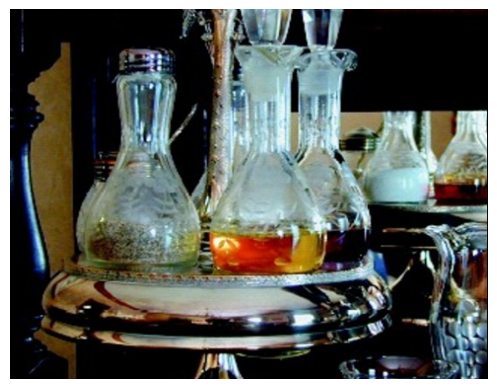

image1:


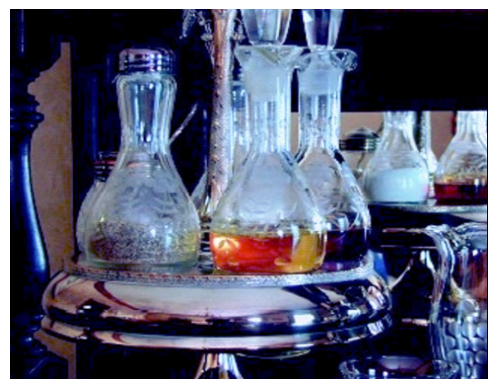

image2:


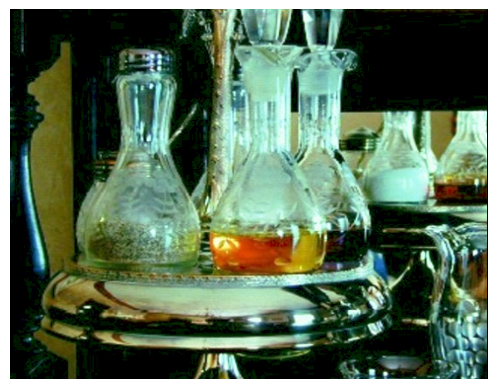

image3:


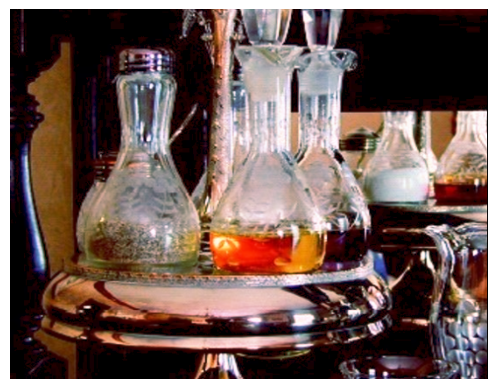

In [9]:
#B、G、R空间逐一做均衡化处理
img = cv2.imread('./files/Fig6.png')
#分离
(b, g, r) = cv2.split(img)
beq = cv2.equalizeHist(b)
geq = cv2.equalizeHist(g)
req = cv2.equalizeHist(r)
# 合并每一个通道
result1 = cv2.merge((beq, g, r))
result2 = cv2.merge((b, geq, r))
result3 = cv2.merge((b, g, req))

show_img(img, 'image')
show_img(result1, 'image1')
show_img(result2, 'image2')
show_img(result3, 'image3')

Fig6A:


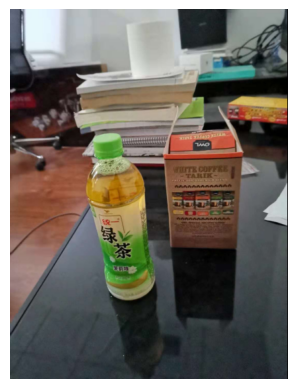

Fig6B:


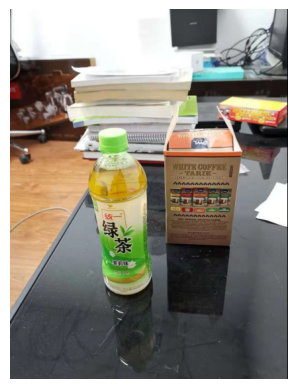

def:


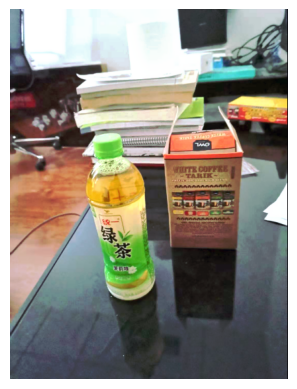

In [11]:
img = cv2.imread('./files/Fig7A.png')
dst = cv2.imread('./files/Fig7B.png')
def_img = cv2.imread('./files/Fig7A.png')
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    hist1, bins = np.histogram(img[:, :, i].ravel(), 256, [0, 256])
    hist2, bins = np.histogram(dst[:, :, i].ravel(), 256, [0, 256])
    
    # 获得累计直方图
    cdf1 = hist1.cumsum()
    cdf2 = hist2.cumsum()
    
    # 归一化处理
    cdf1_hist = hist1.cumsum() / cdf1.max()
    cdf2_hist = hist2.cumsum() / cdf2.max()

    # 初始化二维列表 diff_cdf
    diff_cdf = [[0] * 256 for _ in range(256)]
    for j in range(256):
        for k in range(256):
            diff_cdf[j][k] = abs(cdf1_hist[j] - cdf2_hist[k])

    # 初始化 lut 并查找最小差异的映射
    lut = np.zeros((256, 2), dtype=np.int16)
    for j in range(256):
        squ_min = diff_cdf[j][0]
        index = 0
        for k in range(256):
            if squ_min > diff_cdf[j][k]:
                squ_min = diff_cdf[j][k]
                index = k
        lut[j] = [j, index]

    h = int(img.shape[0])
    w = int(dst.shape[1])
    
    # 对原图像进行灰度值的映射
    for j in range(h):
        for k in range(w):
            def_img[j, k, i] = lut[img[j, k, i]][1]

# 窗口显示图像
cv2.namedWindow('Fig6A', 0)
cv2.resizeWindow('Fig6A', 400, 520)
cv2.namedWindow('Fig6B', 0)
cv2.resizeWindow('Fig6B', 400, 520)
cv2.namedWindow('def', 0)
cv2.resizeWindow('def', 400, 520)
show_img(img, 'Fig6A')
show_img(dst, 'Fig6B')
show_img(def_img, 'def')

In [2]:
# 图像分辨率和灰度级信息
resolution = 40 * 25  # 图像的分辨率
gray_levels = 8  # 灰度级数
histogram_counts = [200, 100, 100, 50, 250, 100, 100, 100]  # 各灰度级的计数

# 计算当前直方图的累积分布函数 (CDF)
current_cdf = [sum(histogram_counts[:i+1]) / resolution for i in range(gray_levels)]

# 目标分布和其CDF
target_distribution = [0.0, 0.0, 0.1, 0.2, 0.3, 0.2, 0.1, 0.1]  # 给定的目标分布
target_cdf = [sum(target_distribution[:i+1]) for i in range(gray_levels)]
target_cdf = [0.0, 0.0, 0.1, 0.3, 0.6, 0.8, 0.9, 1.0]
current_cdf, target_cdf


([0.2, 0.3, 0.4, 0.45, 0.7, 0.8, 0.9, 1.0],
 [0.0, 0.0, 0.1, 0.3, 0.6, 0.8, 0.9, 1.0])

In [3]:
def find_nearest(gray_level, target_cdf):
    """
    在目标CDF中找到最接近当前灰度级CDF值的索引
    """
    difference = [abs(target_cdf[i] - gray_level) for i in range(len(target_cdf))]
    nearest_index = difference.index(min(difference))
    return nearest_index

# 计算灰度级映射
gray_level_mapping = [find_nearest(cdf, target_cdf) for cdf in current_cdf]
gray_level_mapping


[3, 3, 3, 4, 4, 5, 6, 7]